In [1]:
from trajectories import *
from guided_ot import * 
from simplicial_paths import *

# Initialize SC

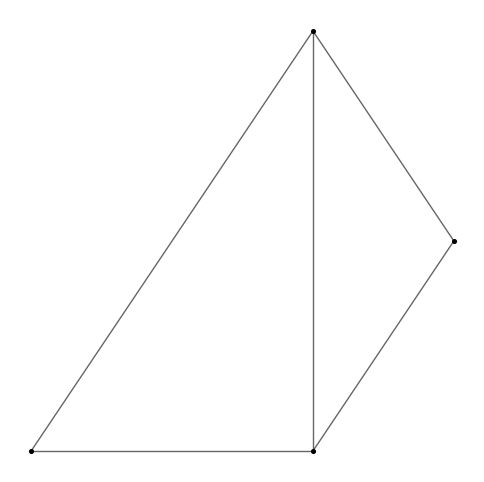

Harmonic Projection Matrix:
[[ 0.61075746 -0.61075746  0.44907446  0.161683   -0.161683  ]
 [-0.04444466  0.04444466  0.54619788 -0.59064254  0.59064254]]


In [2]:
pts = np.array([(1,0), (0,1),  (0,-1), (-2, -1)])
SC = SimplicialComplex(pts, True)
all_edges = np.array([0,1,2,3,4])
edges_to_add = {1:set(all_edges)}
coord_pairs = [[tuple(SC.nodes[i]), tuple(SC.nodes[j]), (i,j)] for (i,j) in SC.edges]
SC.add_simplices(edges_to_add)
plt.figure(figsize=(6,6))
SC.plot()
plt.show()

print("Harmonic Projection Matrix:")
print(SC.H)

[0, 1, 3]


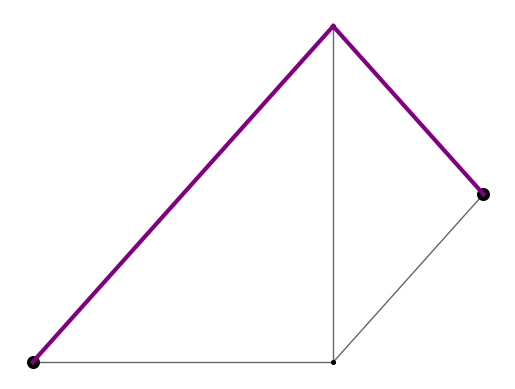

In [3]:
ref_path_class = Trajectory_Class(SC)
ref_path_class.generate_paths([(1,0), (0,1), (-2,-1)], 1, 1, 0)
ref_path_class.plot_paths('purple', 'ref_path')

ref_path = ref_path_class.paths[0]
print(ref_path.nodes)

[[ 0.          0.        ]
 [ 0.61075746 -0.04444466]
 [ 0.77244045 -0.6350872 ]]


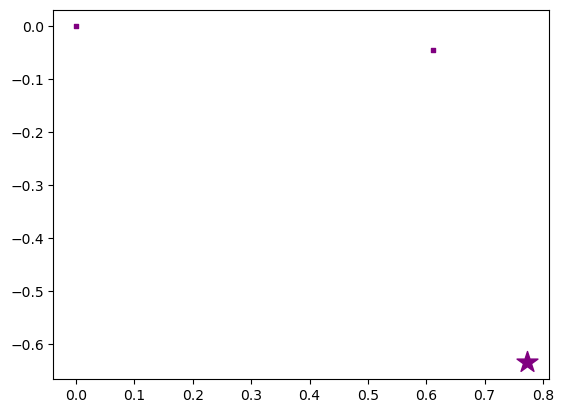

In [4]:
ref_path_class.plot_projections('purple', 'ref_path')

In [16]:
ref_path = ref_path_class.paths[0]
ref_proj = ref_path.edge_projections[-1]
print(f"Reference projection: {ref_proj}")

Reference projection: [ 0.77244045 -0.6350872 ]


# Guided Dijkstra Algorithm via Path Projection

In [19]:
#alpha_star = (np.sqrt(2)-1)/3 # computed this alpha by hand (optimal path transition)
alpha_star = (np.sqrt(2)-1)/2
eps = 0.1
alpha = alpha_star + eps

path, cost = augmented_dijkstra(SC, 0, 3, ref_proj, alpha)
path_proj = path.edge_projections[-1]
print(f"Path projection: {path_proj}")

Path projection: [ 0.77244045 -0.6350872 ]


# Complicated Example

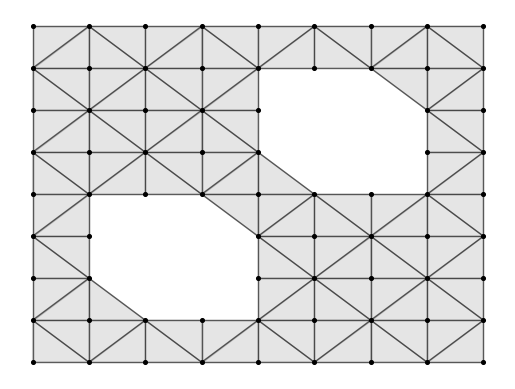

In [45]:
n_side, point_gen_mode = 9, 0
hole_locs = [(-0.4, -0.4), (0.4, 0.4)]
r = 0.3

pts = generate_pts(point_gen_mode, n_side)
SC = SimplicialComplex(pts, True)
all_faces = np.arange(SC.face_vec.shape[0])
faces_to_add = {2:set(all_faces)}
SC.add_simplices(faces_to_add)
SC.make_holes(hole_locs, r)
SC.plot()

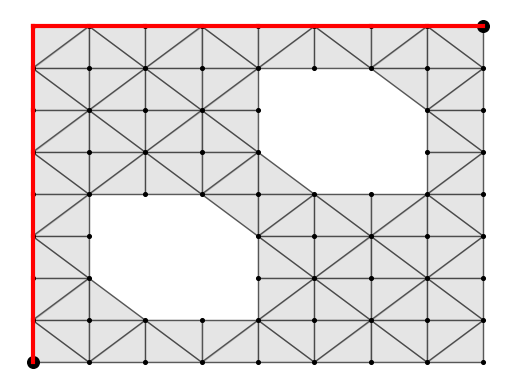

In [63]:
#coords = [(-1,-1), (-0.5, 0.25), (0.5, -0.25), (1,1)]
coords = [(-1,-1), (-1,1), (1,1)]
num_paths, num_nodes = 1, 1

ref_path = Trajectory_Class(SC)
ref_path.generate_paths(coords, num_paths, num_nodes, 1e-1)

ref_path.plot_paths('red', 'ref')

ref proj : [-0.72015737  0.88900174], path proj : [ 0.72015737 -0.88900174]


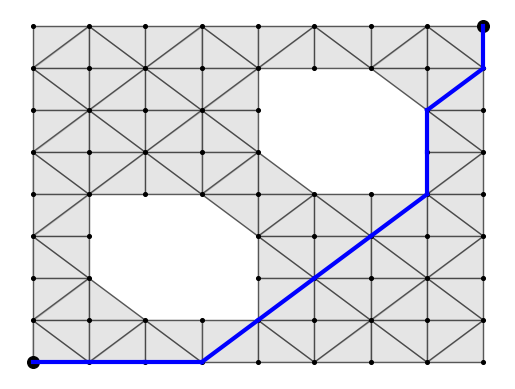

ref proj : [-0.72015737  0.88900174], path proj : [1.09667955 0.88839179]


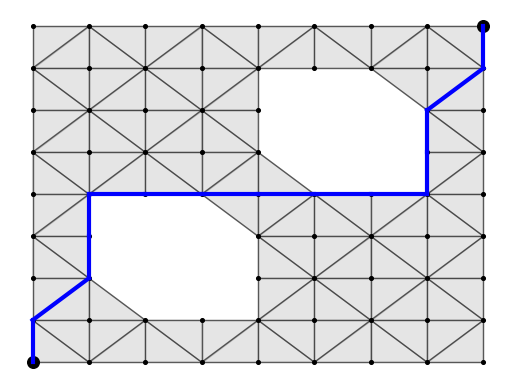

ref proj : [-0.72015737  0.88900174], path proj : [-0.72015737  0.88900174]


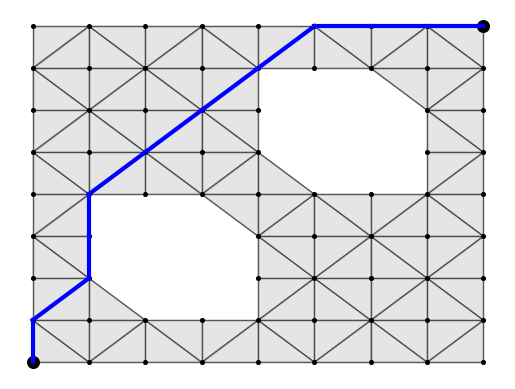

ref proj : [-0.72015737  0.88900174], path proj : [-0.72015737  0.88900174]


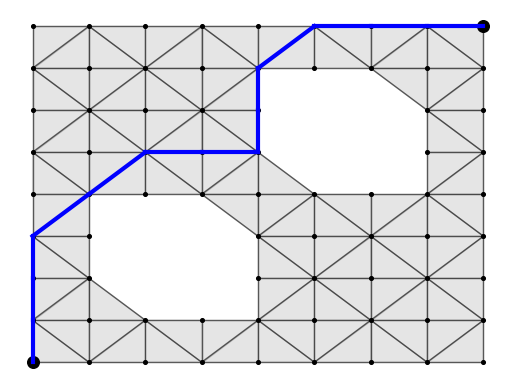

In [64]:
start, end = 0, len(SC.node_vec)-1
ref_path_proj = ref_path.paths[0].edge_projections[-1]
alphas = [0] + [10 ** (i/4) for i in range(8)]

for alpha in alphas:
    path, cost = augmented_dijkstra(SC, start, end, ref_path_proj, alpha, False)
    path_proj = path.edge_projections[-1]
    print(f"ref proj : {ref_path_proj}, path proj : {path_proj}")
    path_coords = [SC.nodes[v] for v in path.nodes]
    res_path = Trajectory_Class(SC)
    res_path.generate_paths(path_coords, num_paths, num_nodes, 1e-1)
    res_path.plot_paths('blue', f'alpha = {alpha}')
    plt.show()

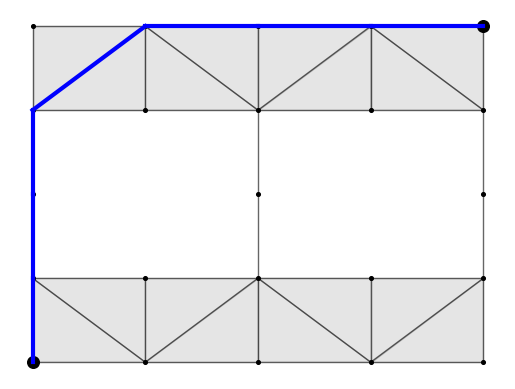